In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
df = pd.read_excel(r"C:\Users\preet\Desktop\Energy_Data.xlsx", sheet_name="Sheet1")
df.head()

,Temp,Volume,Ambiet_Press,Relative_Humid,Energy_output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
df.shape

(9568, 5)

In [4]:
df.describe()

,Temp,Volume,Ambiet_Press,Relative_Humid,Energy_output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [5]:
df.dtypes

Temp              float64
Volume            float64
Ambiet_Press      float64
Relative_Humid    float64
Energy_output     float64
dtype: object

In [6]:
df.columns

Index(['Temp', 'Volume', 'Ambiet_Press', 'Relative_Humid', 'Energy_output'], dtype='object')

In [7]:
df.isna().sum()

Temp              0
Volume            0
Ambiet_Press      0
Relative_Humid    0
Energy_output     0
dtype: int64

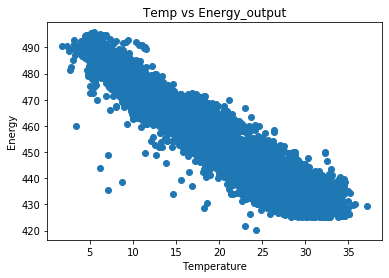

In [8]:
plt.scatter(df['Temp'], df['Energy_output'])
plt.title('Temp vs Energy_output')
plt.xlabel("Temperature")
plt.ylabel("Energy")
plt.show()

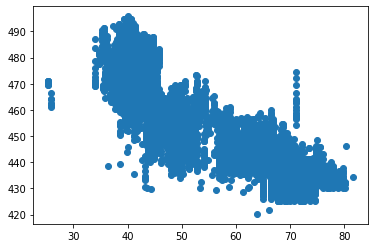

In [9]:
plt.scatter(df['Volume'], df['Energy_output'])
plt.show()



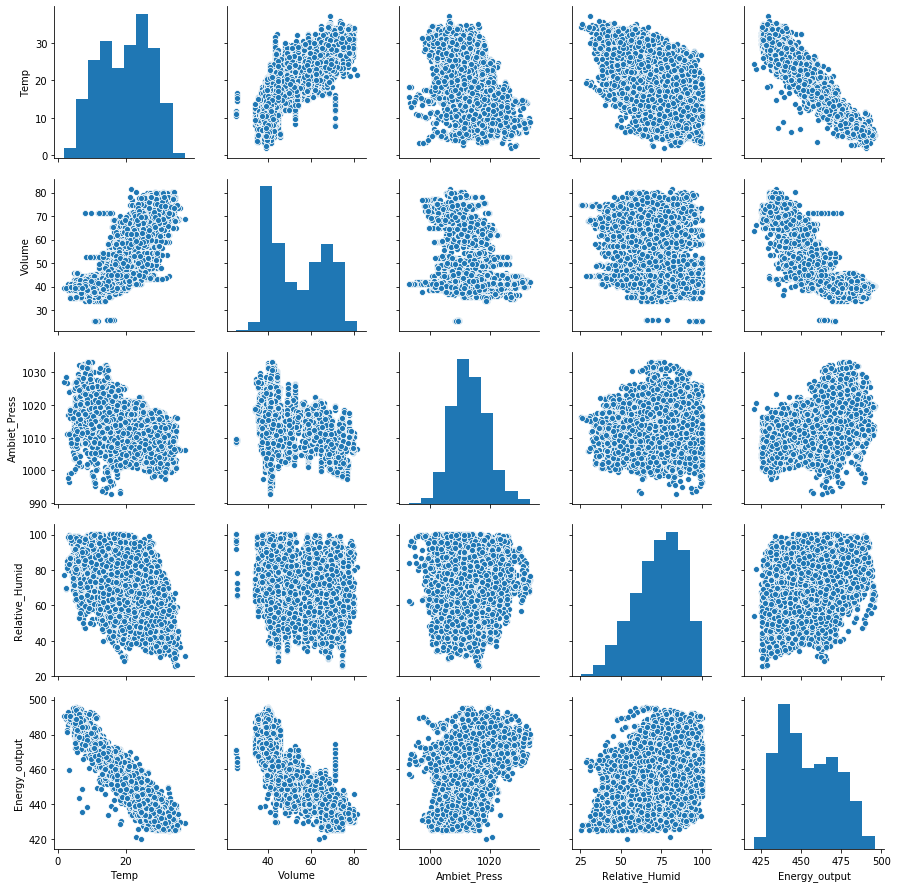

In [10]:
sns.pairplot(df)
plt.show()

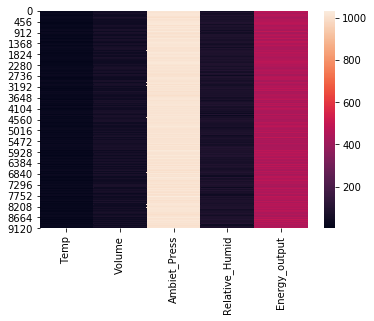

In [11]:
sns.heatmap(df)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [13]:
X = df[['Temp', 'Ambiet_Press']]
Y = df['Energy_output']

In [14]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=15)

In [16]:
poly = PolynomialFeatures(degree=3)
poly_x = poly.fit_transform(X_train)
poly.fit(X_train, y_train)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

In [17]:
model = LinearRegression()
model.fit(poly_x, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_predict = model.predict(poly.fit_transform(X_test))
y_predict[0:4]

array([444.61309391, 446.79196211, 452.76782414, 440.14193118])

In [19]:
#Accuracy of the Model
print(model.score(poly.fit_transform(X_test), y_test))

0.9107556306639665


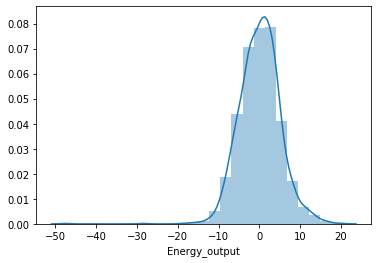

In [20]:
sns.distplot((y_test - y_predict), bins=25)

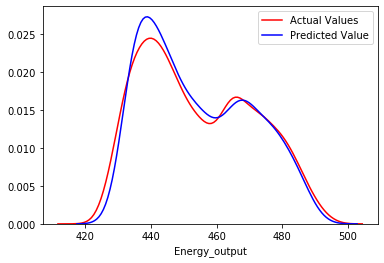

In [21]:
ax1 = sns.distplot(df['Energy_output'], hist=False, color='Red', label='Actual Values')
sns.distplot(y_predict, hist=False, color='blue', label='Predicted Value', ax=ax1)

# Using Multiple Regression Model

In [22]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
yhat = lm.predict(X_test)
yhat[0:4]

array([446.46904367, 448.79568752, 454.10577195, 441.44183169])

In [24]:
print("Accuracy of Multiple Regression Model", lm.score(X_test, y_test))

Accuracy of Multiple Regression Model 0.8951128599071603


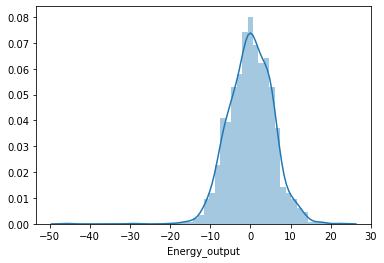

In [25]:
sns.distplot(y_test - yhat)

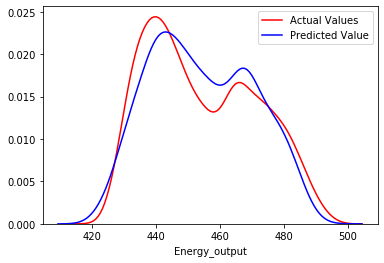

In [26]:
ax1 = sns.distplot(df['Energy_output'], hist=False, color='Red', label='Actual Values')
sns.distplot(yhat, hist=False, color='blue', label='Predicted Value', ax=ax1)

In [27]:
print('Polynomial Model Acc: ', model.score(poly.fit_transform(X_test) , y_test))
print('Multivariate Model Acc: ', lm.score(X_test , y_test))

Polynomial Model Acc:  0.9107556306639665
Multivariate Model Acc:  0.8951128599071603
